In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Shirt


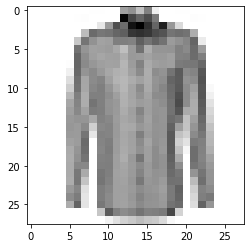

In [3]:
n=3000
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Greys');

In [0]:
from tensorflow.keras.utils import to_categorical

In [0]:
y_train = to_categorical(y_train)
y_test_ = to_categorical(y_test)

In [0]:
x_train = x_train/255
x_test = x_test/255

In [0]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

In [0]:
model = Sequential()

In [0]:
model.add(Conv2D(16, (3,3), padding='same', input_shape=(28,28,1), activation = 'relu'))


In [0]:
#輸出依舊為28*28,chanel=16

In [0]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
#用2*2去掃使他輸出變一半

In [0]:
model.add(Conv2D(32, (3,3), padding='same', activation = 'relu'))

In [0]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
model.add(Conv2D(64, (3,3), padding='same', activation = 'relu'))

In [0]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
model.add(Flatten())


In [0]:
model.add(Dense(60, activation='relu'))

In [0]:
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(loss='mse', optimizer=SGD(lr=0.07), metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

In [0]:
#(3*3*1+1)*16 = 160(以此類推)

#Flatten output = 元素數*channel
#576 = 3*3*64


In [23]:
model.fit(x_train, y_train, batch_size=150, epochs=25)

Epoch 1/25
400/400 [==============================] - 40s 100ms/step - loss: 0.0896 - accuracy: 0.1200
Epoch 2/25
400/400 [==============================] - 40s 100ms/step - loss: 0.0887 - accuracy: 0.2363
Epoch 3/25
400/400 [==============================] - 40s 100ms/step - loss: 0.0867 - accuracy: 0.3180
Epoch 4/25
400/400 [==============================] - 40s 100ms/step - loss: 0.0748 - accuracy: 0.4544
Epoch 5/25
400/400 [==============================] - 40s 100ms/step - loss: 0.0501 - accuracy: 0.6266
Epoch 6/25
400/400 [==============================] - 40s 100ms/step - loss: 0.0421 - accuracy: 0.6908
Epoch 7/25
400/400 [==============================] - 40s 100ms/step - loss: 0.0388 - accuracy: 0.7196
Epoch 8/25
400/400 [==============================] - 40s 100ms/step - loss: 0.0364 - accuracy: 0.7373
Epoch 9/25
400/400 [==============================] - 40s 100ms/step - loss: 0.0345 - accuracy: 0.7518
Epoch 10/25
400/400 [==============================] - 40s 100ms/step - l

>>4
CNN預測: Shirt
正確答案為: Shirt


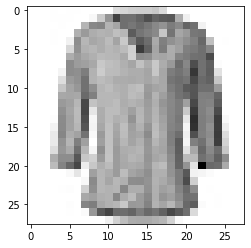

In [36]:
y_predict = model.predict_classes(x_test)
n = input('>>')
n = int(n)
print('CNN預測:',class_names[y_predict[n]])
print('正確答案為:',class_names[y_test[n]])
plt.imshow(x_test[n].reshape(28,28), cmap='Greys')

In [37]:
score = model.evaluate(x_test, y_test_)

313/313 [==============================] - 3s 10ms/step - loss: 0.0237 - accuracy: 0.8381


In [38]:
score

[0.023718591779470444, 0.838100016117096]

In [39]:
print('準確率:', score[1])

準確率: 0.838100016117096
